<a href="https://colab.research.google.com/github/StillWork/AIDD-LAIDD/blob/main/z7_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오토인코더
- 이미지, 사람, 상품, 분자 등 어떤 객체(object)를 표현하는 신호를 적은 크기의 정보량으로 압축한 후 다시 재구성하는 모델
- 입력 자신을 재구성하므로 오토인코더(autoencoder)라고 한다
- 입력 신호를 작은 크기의 압축된 벡터로 표현하면 이를 이용하여 distrete하게 표현되던 객체를 연속공간의 벡터 값들로 표현할 수 있게 된다
- 이를 잠재 벡터 (latent vector) 또는 임베딩 벡터라고 한다
- 오토인코더는 잠재 벡터를 얻는 편리한 방법중 하나이다
 - 잠재 벡터를 얻는 방법은 매우 다양하며 대표적인 것이 단어를 임베딩 벡터로 표현한 word2vec이다
 - word2vec을 만들때는 입력 문장에서 가린 단어를 예측하는 훈련을 시킨다

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-27%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.18.39.png?raw=1" width=700>


- 어떤 객체를 임베딩 "벡터"로 표현하면 얻는 장점은 다음과 같다
 - 벡터로 표현되면 샘플간의 거리를 쉽게 계산할 수 있고 유사한 샘플, 거리가 먼 샘플을 쉽게 찾아낼 수 있다. 또한 클러스터링도 쉽게 구현할 수 있다
 - 벡터 공간상에서는 방향을 계산할 수 있다
 - 경사하강법 기반의(즉 gradient 미분에 기반한) 연속형 탐색이 가능해진다. 바로 옆의 벡터값을 갖는 샘플은 성격이 비슷할 것으로 추정할 수 있다
- 신약개발에 활용
 - 분자를 잠재 공간에서 표현하면 분자간 interpolation이 가능하고, 원하는 특성을 갖는 분자를 찾거나 생성할 수 있다



## 예제
- MNIST 이미지 재구성하는 데 오토인코더를 사용하는 예를 보이겠다
- [참고블로그](https://idiotdeveloper.com/introduction-to-autoencoders/)

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-27%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2012.00.33.png?raw=1" width=700>

- 인코더와 디코더로 MLP를 사용하겠다

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-27%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2012.00.59.png?raw=1" width=700>

# import

In [30]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

# 데이터
- 입력 이미지를 재구성하므로 입력 이미지를 레이블로 사용할 수 있다. 별도의 레이블이 필요없다

In [31]:
(X_train, _), (X_test, _) = mnist.load_data()

In [32]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## 데이터 전처리
- 스케일링과 flat화
- MLP 모델은 입력으로 차원이 1인, 벡터만 받을 수 있다

In [33]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

In [34]:
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

# 오코인코더 모델
- 1개의 히든 계층만 있는 단순한 모델을 사용하겠다

In [35]:
input_size = 784
hidden_size = 64
output_size = 784

In [36]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [37]:
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


# 오토인코더 학습

In [38]:
epochs = 5
batch_size = 32

history = autoencoder.fit(X_train_flat, X_train_flat, batch_size=batch_size, 
        epochs=epochs, verbose=1, validation_data=(X_test_flat, X_test_flat))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0241 - val_loss: 0.0093
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0069 - val_loss: 0.0053
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0044 - val_loss: 0.0041


## 벡터값 시각화

313/313 [==============================] - 0s 1ms/step
[[4.1701193e+00 3.6986637e+00 5.6516266e+00 1.4825027e+00 6.1419926e+00
  1.0278418e+01 5.3484612e+00 4.8412108e+00 2.2199733e+00 4.0114737e+00
  2.1102986e+00 5.2467427e+00 4.1976662e+00 4.1027441e+00 5.7524929e+00
  3.0941346e+00 4.6421213e+00 1.0337757e+00 2.3004062e+00 5.3536777e+00
  4.7181344e+00 0.0000000e+00 4.9701853e+00 8.7531061e+00 3.3529878e+00
  6.0694370e+00 2.8860986e+00 2.0106406e+00 4.1598964e+00 1.6179757e+00
  5.5461197e+00 3.3162100e+00 3.1934605e+00 4.8360982e+00 5.0320582e+00
  7.1188040e+00 2.5923324e+00 5.9784327e+00 5.2227926e+00 5.7445564e+00
  1.3407201e+00 1.0594855e+01 4.7992954e+00 1.6306545e+00 6.1546092e+00
  8.8677669e-01 5.8988013e+00 7.7391672e+00 3.2582636e+00 0.0000000e+00
  2.3473754e+00 1.9720602e+00 4.6950512e+00 7.3266578e-01 8.9947981e-01
  2.4849205e+00 7.3185868e+00 3.9798393e+00 8.6328735e+00 4.9207993e+00
  5.5188437e+00 4.0842352e+00 3.0166476e+00 2.2805152e+00]
 [4.2853322e+00 1.4177

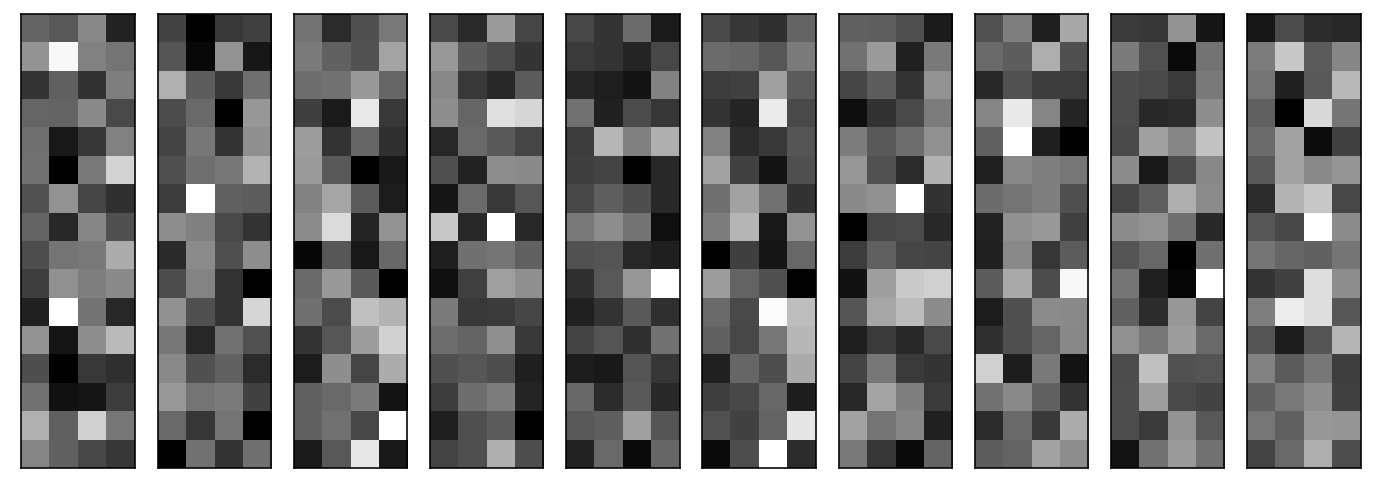

In [39]:
img_encoder = Model(x, h)
encoded_imgs = img_encoder.predict(X_test_flat)

# 잠재 벡터값 보기
print(encoded_imgs[:2])

# 그림을 그릴 개수 
n = 10

plt.figure(figsize=(12, 6))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(16, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 원본과 재구성된 이미지 비교

In [40]:
decoded_imgs = autoencoder.predict(X_test_flat)

313/313 [==============================] - 0s 1ms/step


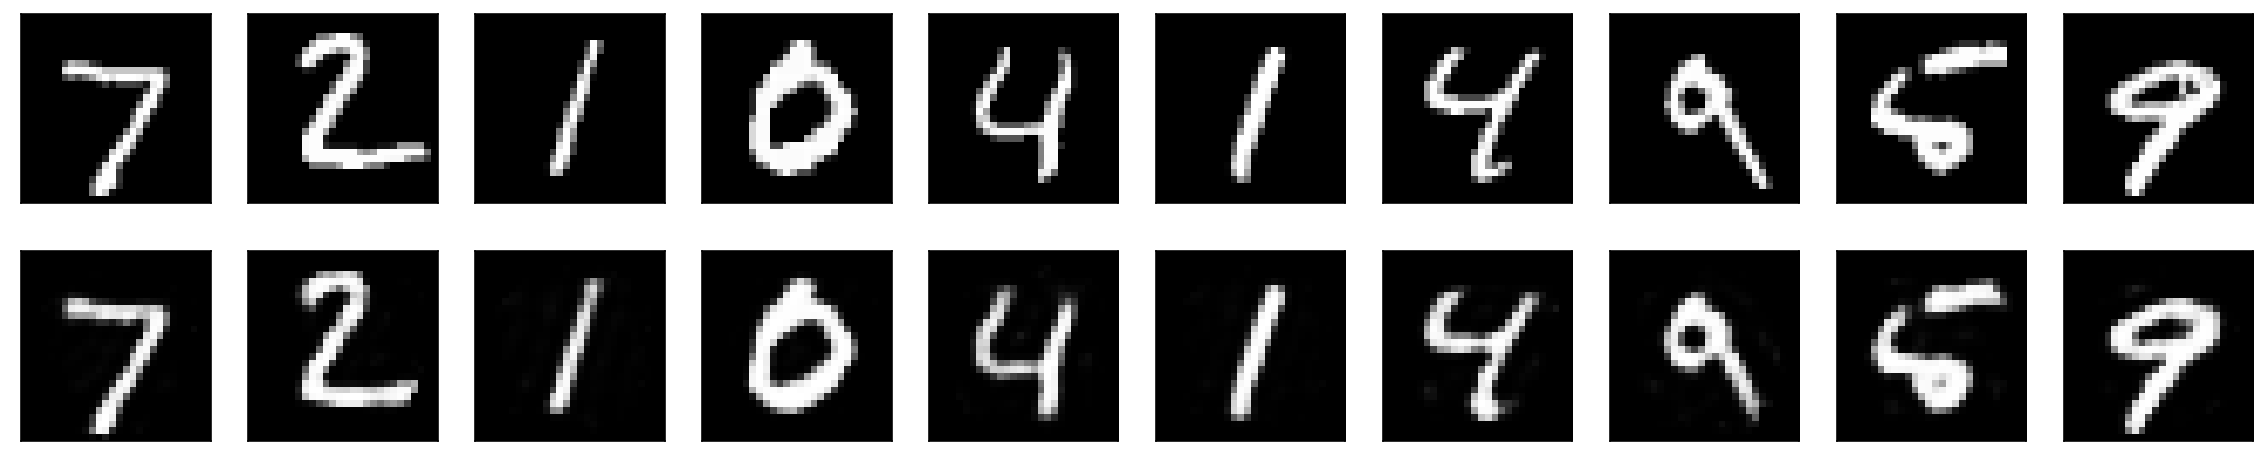

In [41]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # 재구성된 이미지
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()